<a href="https://colab.research.google.com/github/Raivotar/Projetos_de_Negocio/blob/main/Notebook/Projeto_de_Negocio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entendendo o Problema:
Nesse projeto vamos trabalhar o conjunto de dados "Credit Card Customers" da plataforma Kaggle (https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers)
- Gerente do banco está preocupado com a evasão de clientes que usam cartão de crédito.
- Nos foi fornecido uma carteira de clientes para fazer um modelo preditivo e aplicar esse modelos em outras carteiras para identificar os clientes propensos a evadir e fazer um contato preventivo a esses clientes.

#Exploração dos dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.stats import ranksums
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Raivotar/Projetos_de_Negocio/main/Dados/BankChurners.csv")

In [ ]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

Na documentação do banco de dados é informado para desconsiderar as duas colunas que estamos excluindo.

In [ ]:
data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
           'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
          axis=1, inplace=True)

Não há valores nulos

In [ ]:
data.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Visão geral dos dados

In [ ]:
data.set_index("CLIENTNUM", inplace=True)
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Definição do target
A variavel "Attrition_Flag" é nosso target, onde verificamos 8500 clientes ativos e 1627 que evadiram, portanto nosso trabalho visa encontrar desses 8500 clientes, quais estão propensos a evadir.
A principio vamos tratar esse problema como Classificação de uma variavel binária

In [ ]:
data["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
data.shape

(10127, 20)

In [ ]:
data['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [ ]:
rename = {
    'Existing Customer': 1,
    'Attrited Customer': 0
}
data["Attrition_Flag"] = data["Attrition_Flag"].map(rename)

## Identificação de variáveis categóricas e numéricas

Estamos usando a estratégia de identificar as variáveis que são do tipo objeto para classifica-las como categoricas.

In [ ]:
cat_vars = [var for var in data.columns 
            if data[var].dtype == 'O' and var != 'Attrition_Flag']

num_vars = [var for var in data.columns
           if data[var].dtype != 'O' and var != 'Attrition_Flag']

print(f'Número de variáveis categóricas: {len(cat_vars)}')
print(f'Número de variáveis numéricas: {len(num_vars)}')

Número de variáveis categóricas: 5
Número de variáveis numéricas: 14


### Variáveis numéricas

In [ ]:
num_vars

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [ ]:
data[num_vars].describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


#### Variáveis continuas e discretas

Como podemos verificar no método describe temos uma grande dispersão de valores ao comparar as variáveis entre si, por exemplo a variável "Avg_Open_To_Buy" tem  faixa de valores entre 3 a 34 mil enquanto a variável "Dependent_count" tem faixa de 0 a 5.
Sendo assim, identificamos que todas variáveis com valor máximo menor que 140 possuem caracteristicas de variável discreta por se tratar de contagem sobre algum evento, com exceção da variável "Avg_Utilization_Ratio" por se tratar da taxa de utilização.
Dessa forma iremos fazer a seguinte separação.

In [ ]:
continua = []
discreta = []
for var in num_vars:
    if data[var].nunique() < 140:
        discreta.append(var)
    else: 
        continua.append(var)
        
print(f'Temos {len(continua)} variáveis continuas')
print(f'As variáveis continuas são {continua}')
print('')
print(f'Temos {len(discreta)} variáveis discretas')
print(f'As variáveis discretas são {discreta}')


Temos 7 variáveis continuas
As variáveis continuas são ['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

Temos 7 variáveis discretas
As variáveis discretas são ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Trans_Ct']


### Variáveis categóricas

In [ ]:
cat_vars

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

## Visualização para gerar insights 

### Variáveis continuas

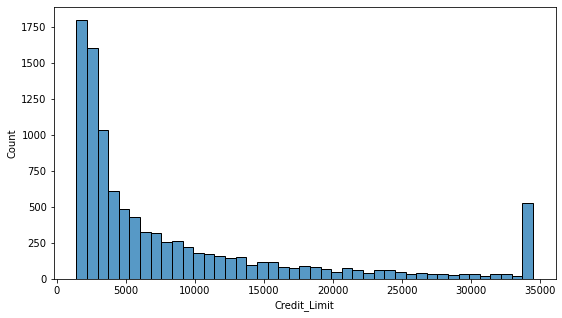

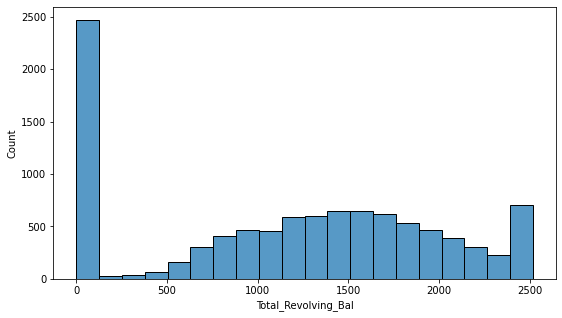

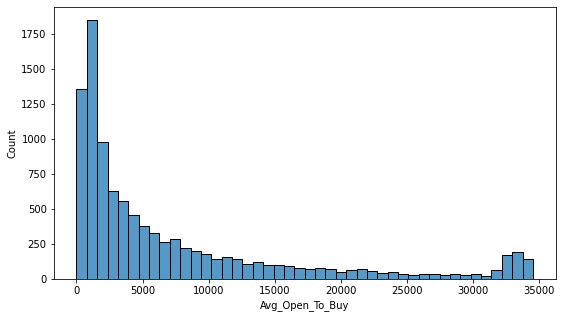

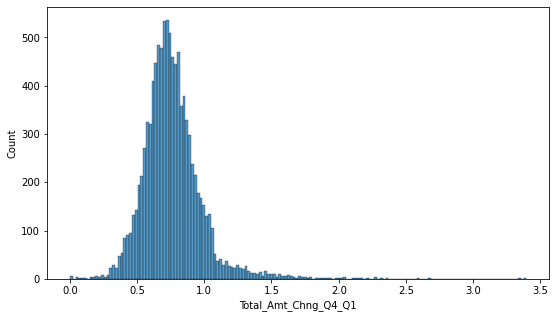

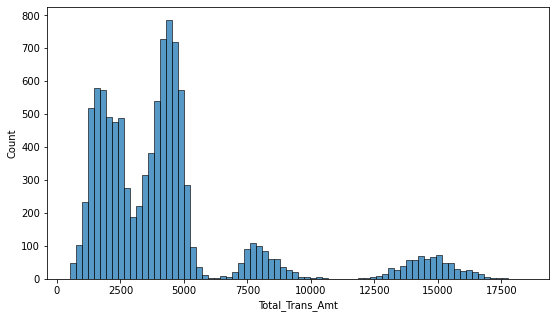

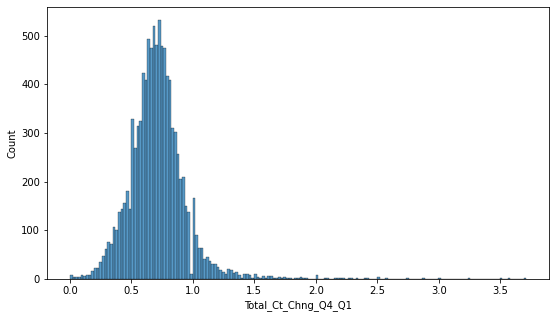

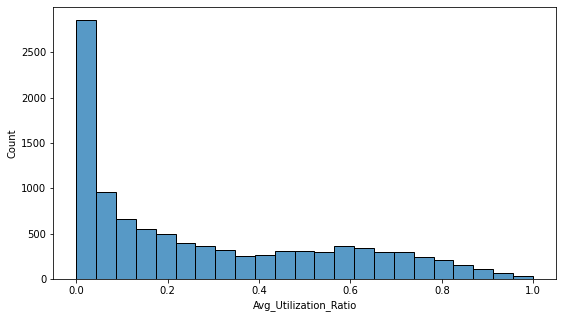

In [ ]:
for i in continua:
  fig, ax =plt.subplots(figsize=(9, 5))
  sns.histplot(data[i])
  fig.show()

Observamos que diretamente nenhuma das variáveis continuas apresentam distribuição normal perfeita, porem com tratamento de outliers, as variáveis "Total_Revolving_Bal", "Total_Amt_Chng_Q4_Q1" e "Total_Ct_Chng_Q4_Q1" apresentam distribuição normal.

In [ ]:
data[continua].corr()

,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Credit_Limit,1.000000,0.042493,0.995981,0.012813,0.171730,-0.002020,-0.482965
Total_Revolving_Bal,0.042493,1.000000,-0.047167,0.058174,0.064370,0.089861,0.624022
Avg_Open_To_Buy,0.995981,-0.047167,1.000000,0.007595,0.165923,-0.010076,-0.538808
Total_Amt_Chng_Q4_Q1,0.012813,0.058174,0.007595,1.000000,0.039678,0.384189,0.035235
Total_Trans_Amt,0.171730,0.064370,0.165923,0.039678,1.000000,0.085581,-0.083034
Total_Ct_Chng_Q4_Q1,-0.002020,0.089861,-0.010076,0.384189,0.085581,1.000000,0.074143
Avg_Utilization_Ratio,-0.482965,0.624022,-0.538808,0.035235,-0.083034,0.074143,1.000000


Analisando as correlações, a única expressiva que encontramos é a correlação entre "Credit_Limit" e "Avg_Open_To_Buy" com correlação de 0.99. Sendo assim descartaremos a "Avg_Open_To_Buy".

In [ ]:
continua.remove('Avg_Open_To_Buy')

### Variaveis discretas

In [ ]:
discreta

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Total_Trans_Ct']

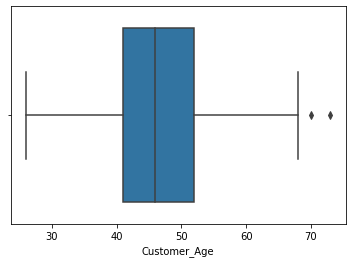

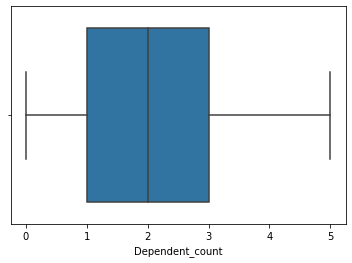

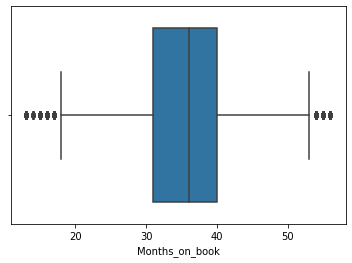

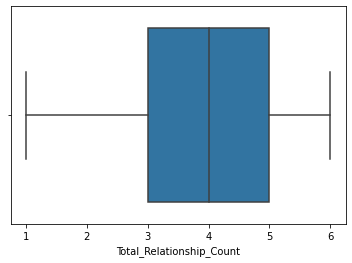

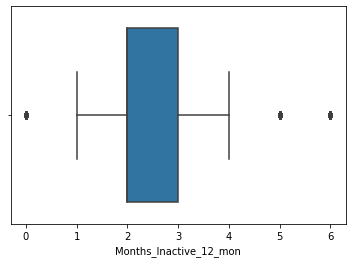

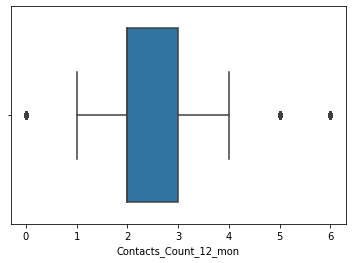

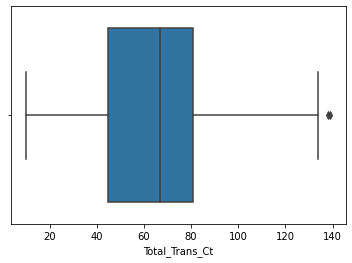

In [ ]:
for i in discreta:
  sns.boxplot(x=i, data=data)
  plt.show()

Visualizando os gráficos temos uma boa ideia de como se distribuem as variáveis discretas.

### Variáveis categóricas

In [ ]:
cat_vars

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

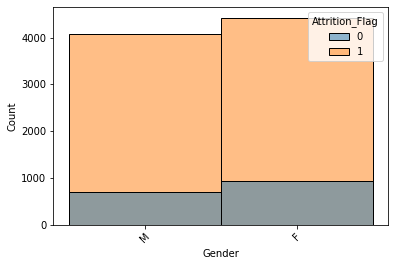

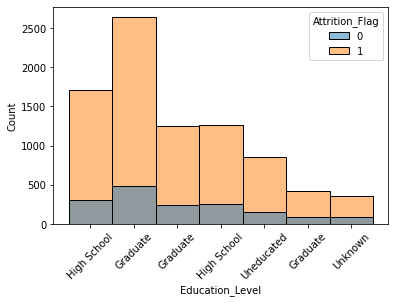

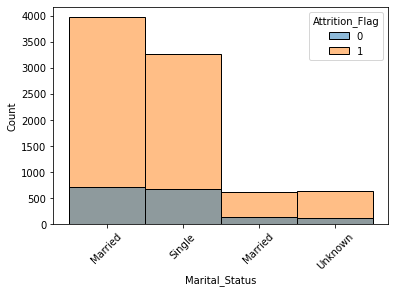

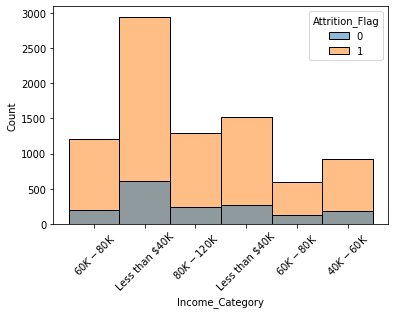

In [ ]:
for i in cat_vars:
  if i == 'Card_Category':
    continue
  ax = sns.histplot(x=i, hue='Attrition_Flag', data=data)
  ax.set_xticklabels(data[i].values, rotation=45)
  plt.show()

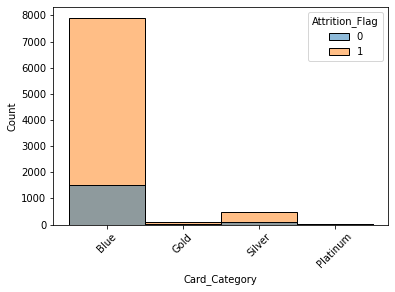

In [ ]:
ax = sns.histplot(x='Card_Category',hue='Attrition_Flag', data=data)
ax.set_xticklabels(data['Card_Category'].unique(), rotation=45)
plt.show()

Nos gráficos das variáveis categóricas podemos verificar como estão distribuidos os clientes. Também é possível identificar a quantidade de clientes que evadiram, porem não é possível tirar conclusões visto que não há nenhuma categoria que se destaque por ter um alto índice de evasão, de modo geral as categorias que mais possuem clientes, proporcionalmente também perderam mais clientes.

### Conclusão 

- Variáveis continuas: Identificamos a importância de normalizar os dados devido a grande discrepancia de valores, também vimos a necessidade de tratar os outliers para poder trabalhar com as distribuições normais. Duas variáveis apresentaram alta correlação entre si, portanto eliminamos uma delas da analise.
- Variáveis discretas: Tivemos uma ideia de como estão distribuidas essas variáveis e também identificamos a presença de outliers.
- Variáveis categóricas: Também tivemos uma ideia de como estão distribuidas essas variáveis, porem não foi possível identificar nenhuma variável que se destaque com relação a clientes evadidos, portanto seguimos o modelo com todas.

## Tratamento dos dados


### Normalização das variáveis continuas

Observamos que a faixa do valor de limite é de 1438 a 34516, com média de 8631 e desvio padrão de 9088. a faixa da quantidade de transações é de 10 a 139, com média de 64 e desvio padrão de 23. Como a escala dos valores é muito diferente, para melhorar a qualidade dos dados é necessario normalizar esses valores.
Inicialmente iremos realizar a normalização com métodos manuais, sem uso de bibliotecas que realizam essa atividade.

In [ ]:
data['Credit_Limit'].describe()

count    10127.000000
mean      8631.953698
std       9088.776650
min       1438.300000
25%       2555.000000
50%       4549.000000
75%      11067.500000
max      34516.000000
Name: Credit_Limit, dtype: float64

In [ ]:
data['Total_Trans_Ct'].describe()

count    10127.000000
mean        64.858695
std         23.472570
min         10.000000
25%         45.000000
50%         67.000000
75%         81.000000
max        139.000000
Name: Total_Trans_Ct, dtype: float64

#### Normalização manual
$$X_n = (X_n - mean) / std $$

In [ ]:
data_manual = pd.DataFrame()
for i in continua:
  data_manual[i] = (data[i] - data[i].mean())/data[i].std()

In [ ]:
data_manual[continua].describe()

,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04
mean,1.089401e-14,2.578498e-17,-1.243346e-14,-7.467338e-16,3.846095e-15,8.870492e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.914876e-01,-1.426788e+00,-3.466775e+00,-1.146287e+00,-2.991449e+00,-9.971058e-01
25%,-6.686217e-01,-9.862902e-01,-5.882147e-01,-6.619078e-01,-5.469550e-01,-9.136792e-01
50%,-4.492303e-01,1.388806e-01,-1.092149e-01,-1.486803e-01,-4.293563e-02,-3.587110e-01
75%,2.679730e-01,7.622032e-01,4.518991e-01,9.917600e-02,4.442831e-01,8.273976e-01
max,2.847913e+00,1.661604e+00,1.203001e+01,4.144651e+00,1.260795e+01,2.626510e+00


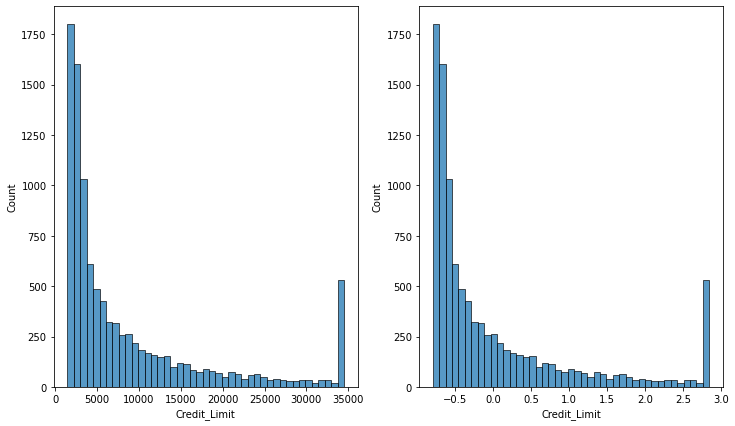

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(12, 7))

sns.histplot(data["Credit_Limit"], ax=ax[0])
sns.histplot(data_manual["Credit_Limit"], ax=ax[1])

fig.show()

No gráfico temos a plotagem do histograma da variável "Credit_Limit" antes e depois da normalização, onde podemos observar que a Normalização manual não afeta a distribuição, mudando apenas o alcance da variável que antes era de 0 a 35000 e agora ficou de -0.7 a 2.8.

#### Normalização usando Normalizer do sklearn.preprocessing

In [ ]:
from sklearn.preprocessing import Normalizer

X = data[continua]

scaler = Normalizer().fit(X)
normalized_X = scaler.transform(X)
data_norm = pd.DataFrame(normalized_X)

A Normalização perde o nome das variáveis, portanto vamos corrigir.

In [ ]:
rename = pd.Series(continua, index=range(0, len(continua)))
data_norm.rename(columns=rename, inplace=True)

In [ ]:
data_norm.describe()

,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,1.012700e+04
mean,0.720019,0.165950,0.000116,0.542609,0.000108,5.196095e-05
std,0.231567,0.155178,0.000081,0.286218,0.000077,6.553981e-05
min,0.190972,0.000000,0.000000,0.018049,0.000000,0.000000e+00
25%,0.520719,0.022011,0.000053,0.284382,0.000048,6.996117e-07
50%,0.761066,0.131622,0.000107,0.558154,0.000100,1.760935e-05
75%,0.942823,0.270969,0.000154,0.810373,0.000146,9.761351e-05
max,0.999800,0.669514,0.000932,0.980905,0.001425,4.258506e-04


Verificamos que agora os valores estão entre 0 e 1.

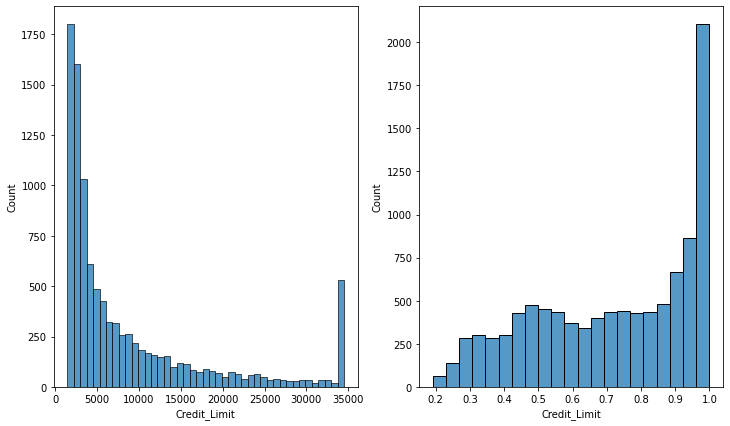

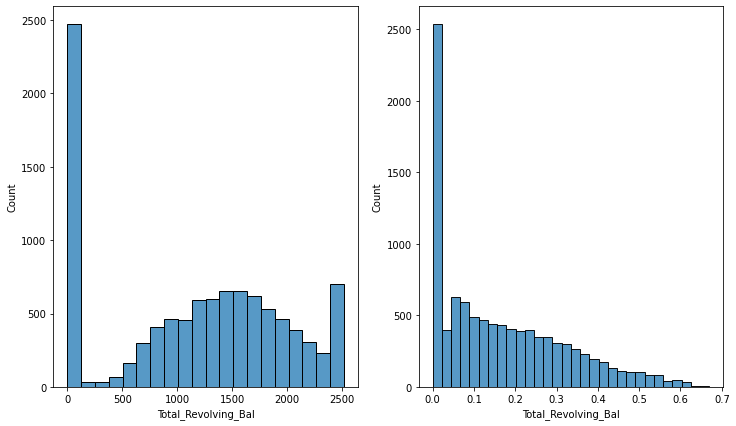

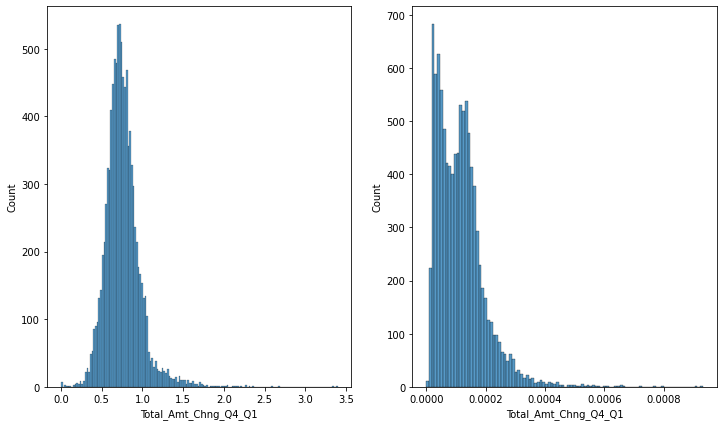

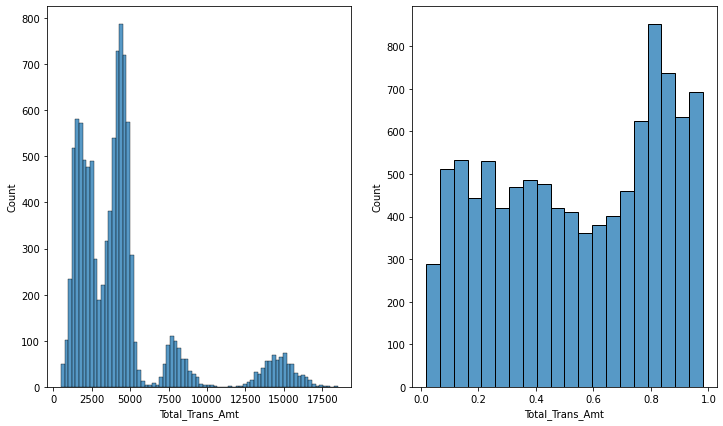

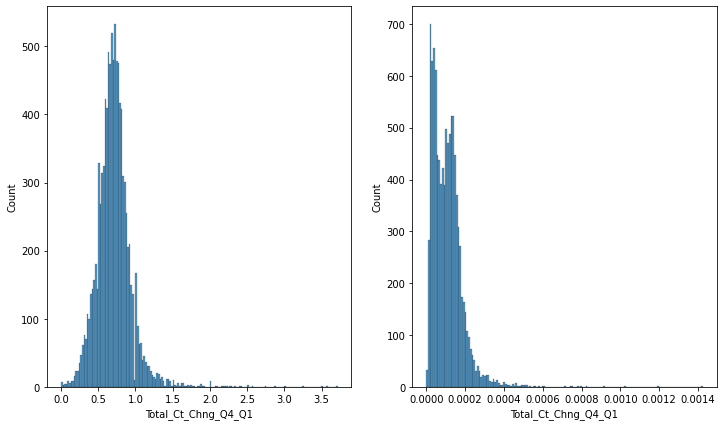

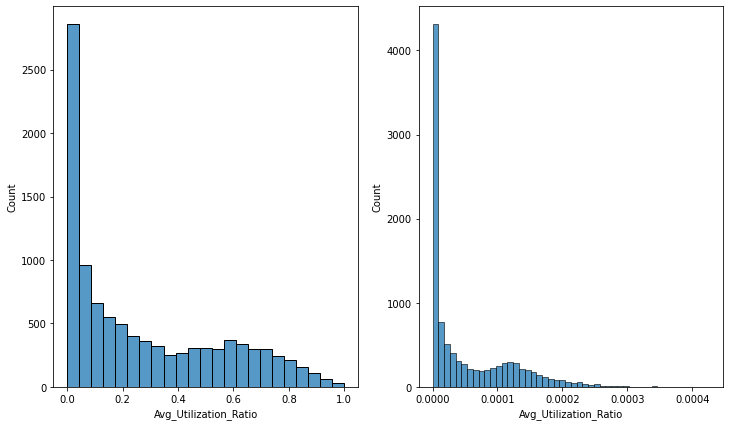

In [ ]:
for i in continua:
  fig, ax =plt.subplots(1,2, figsize=(12, 7))

  sns.histplot(data[i], ax=ax[0])
  sns.histplot(data_norm[i], ax=ax[1])

  fig.show()

Diferente do que vimos na implementação manual da normalização, usando o Normalizer da biblioteca sklearn, a distribuição das variáveis mudou.

### Tratando variáveis categóricas

Para o tratamento das variáveis categóricas iremos usar a estratégia do One-hot-encoder, conforme segue.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(data[cat_vars]).toarray())

Transformando os nomes de colunas em Strings, pois o modelo de regressão logistíca do Sklearn pede que todas features sejam Strings.

In [ ]:
rename_col = [str(i) for i in encoder_df.columns.values]
rename = pd.Series(rename_col, index=range(0, len(rename_col)))
encoder_df.rename(columns=rename, inplace=True)

### Junção das variáveis em um novo DataFrame

In [ ]:
discret = data[discreta].reset_index()
discret.drop("CLIENTNUM", axis=1, inplace=True)
final_data = data_norm
final_data = final_data.join(encoder_df)
final_data = final_data.join(discret)
final_data.head()



,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,0,1,2,3,...,20,21,22,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Trans_Ct
0,0.994115,0.060864,0.000105,0.089612,0.000127,0.000005,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,45,3,39,5,1,3,42
1,0.982755,0.102846,0.000183,0.153674,0.000442,0.000012,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,49,5,44,6,1,2,33
2,0.875447,0.000000,0.000664,0.483314,0.000598,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,51,3,36,4,1,0,20
3,0.766485,0.582325,0.000325,0.270919,0.000540,0.000176,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,40,4,34,3,4,1,20
4,0.985358,0.000000,0.000454,0.170495,0.000522,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,40,3,21,5,1,0,28


## Dividindo os dados em treino e teste

- Vamos prosseguir a analise utilizando os dados normalizados pela biblioteca Sklearn
- A divisão será feita 70% para treino e 30% para validação

In [ ]:
from sklearn.model_selection import train_test_split


y = data['Attrition_Flag']
X = final_data

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, train_size=0.7)

# Modelagem

## Implementação manual de Regressão Logística

In [ ]:
class RegressaoLogistica:
  def __init__(self, lr=0.001, n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    # Iniciando os parametros
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    # Gradient Descent
    for _ in range(self.n_iters):
      linear_model = np.dot(X, self.weights) + self.bias
      y_predicted = self._sigmoid(linear_model)

      dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
      db = (1 / n_samples) * np.sum(y_predicted - y)

      self.weights -= self.lr * dw
      self.bias -= self.lr * db

  def predict(self, X, threshold=0.5):
    linear_model = np.dot(X, self.weights) + self.bias
    y_predicted = self._sigmoid(linear_model)
    y_predicted_cls = [1 if i > threshold else 0 for i in y_predicted]
    return y_predicted_cls

  def _sigmoid(self, x):
    return 1 / (1 + np.exp(-x))

## Predições usando a implementação manual da Regressão Logística

In [ ]:
rl = RegressaoLogistica()
rl.fit(X_train, y_train)
predicoes = rl.predict(X_val, threshold=0.5)

## Predições usando Regressão Logística da biblioteca Sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, max_iter=1000)
lr.fit(X_train, y_train)
predicoes_sklearn = lr.predict(X_val)

## Métrica para avaliar os modelos

- O ROC possui dois parâmetros:
1. Taxa de verdadeiro positivo (True Positive Rate), que é dado por true positives / (true positives + false negatives)
2. Taxa de falso positivo (False Positive Rate), que é dado por false positives / (false positives + true negatives)
- Assim, na tentativa de simplificar a análise da ROC, a AUC (“area under the ROC curve”) nada mais é que uma maneira de resumir a curva ROC em um único valor, agregando todos os limiares da ROC, calculando a “área sob a curva”.


Fontes:
- https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

In [ ]:
from sklearn.metrics import roc_auc_score

print(f"Implantação manual: ROC-AUC: {roc_auc_score(y_val, predicoes, average=None)}")
print(f"Implantação Sklearn: ROC-AUC: {roc_auc_score(y_val, predicoes_sklearn, average=None)}")

Implantação manual: ROC-AUC: 0.5376003525072844
Implantação Sklearn: ROC-AUC: 0.7349000040752287


### Melhorando a implantação manual da regressão logistíca 

Threshold na regressão logistíca é o valor de corte para classificar uma predição como verdadeira ou falsa. 

- Selecionando o threshold ideal
- Tendo em vista o elevado custo computacional, vamos dividir em duas partes. 
- Primeiramente vamos buscar o melhor valor entre 0 e 1 com passo de 0.1.

In [ ]:
roc = 0
i_ = 0
for i in np.arange(0.0, 1.0, 0.1):
  rl = RegressaoLogistica()
  rl.fit(X_train, y_train)
  predicoes = rl.predict(X_val, threshold=i)
  roc_calc = roc_auc_score(y_val, predicoes, average=None)
  if roc_calc > roc:
    roc = roc_calc
    i_ = i
print(roc)
print(i_)

0.7789201153289729
0.8


Encontramos o melhor valor como sendo 0.8. Agora vamos verificar o melhor valor entre 0.7 e 0.9 com passo de 0.01.

In [ ]:
roc = 0
i_ = 0
for i in np.arange(0.7, 0.9, 0.01):
  rl = RegressaoLogistica()
  rl.fit(X_train, y_train)
  predicoes = rl.predict(X_val, round(i, 2))
  roc_calc = roc_auc_score(y_val, predicoes, average=None)
  if roc_calc > roc:
    roc = roc_calc
    i_ = i
print(roc)
print(i_)

0.7902658067934063
0.8300000000000001


In [ ]:
rl = RegressaoLogistica()
rl.fit(X_train, y_train)
predicoes = rl.predict(X_val, threshold=0.83)

Implementando o threshold como 0.83 obtemos um roc-auc de 0.79 superando a predição do modelo sklearn. Há métodos para melhorar a qualidade do modelo sklearn, porem não é alvo deste projeto.

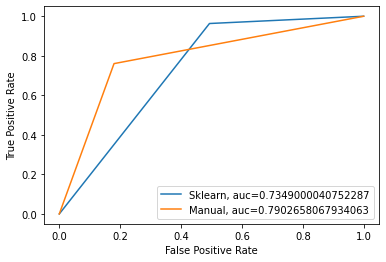

In [ ]:
#Curva AUC
fpr, tpr, _ = metrics.roc_curve(y_val,  predicoes)
auc = metrics.roc_auc_score(y_val, predicoes)

fpr_sklearn, tpr_sklearn, _ = metrics.roc_curve(y_val,  predicoes_sklearn)
auc_sklearn = metrics.roc_auc_score(y_val, predicoes_sklearn)

sns.lineplot(x=fpr_sklearn, y=tpr_sklearn, label="Sklearn, auc="+str(auc_sklearn))
sns.lineplot(x=fpr, y=tpr, label="Manual, auc="+str(auc))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

# Conclusão final

- Desenvolvemos um modelo preditivo para identificar clientes propensos a evadir.
- Nosso modelo deve ser usado em outras carteiras de clientes para identificar os clientes propensos a evadir e dessa forma rete-los através de uma abordagem preventiva.